In [2]:
source('../src/load_data.r')
bh2 <- BostonHousing2

In [6]:
source('multiplot.r')

In [3]:
library(dplyr, warn.conflicts = FALSE)
library(moments)
library(ggplot2)

In [4]:
bh2_numeric_feat <- Filter(is.numeric, bh2)

In [5]:
# standardize the data
for (n in 1:length(colnames(bh2_numeric_feat))) {
    col_ <- bh2_numeric_feat[,n]
    mean_ <- mean(col_)
    sd_ <- sd(col_)
    zscr <- col_ - mean_; zscr <- zscr/sd_
    if (n == 1) {
        bh2_zscr = data.frame(zscr)
    }
    else {
        bh2_zscr = cbind(bh2_zscr, zscr)        
    }
    colnames(bh2_zscr)[n] <- colnames(bh2_numeric_feat)[n]
}

#### Discuss how we can assess skew from these plots.
Features that are not symmetrical are skew. We can look at the distribution plots to see how symmetrical the features are. We say that the data skews in the direction of where the outliers are, where the distribution thins out so to speak. The direction of skew is in the direction of "the tail of the whale". 

#### discuss how the plots show the transformation that's been applied
The plots show that the data has been scaled. The distribution is the same, but the axis show that the data has been scaled.


#### taking the log of dataset
The dataset includes zero values in the 'zn' feature which tells us proportion of residential land zoned for lots over 25,000 sq.ft. in a Census tract. Over half of the 'zn' values are zero, while the rest have a max of 100. This feature includes many outliers. I will just change those zero values to one before taking the log of the dataset. Those zero values will become one and the log of one is zero. 

Normally, the log of a number is smaller than that number. By not taking the log of zero, I am keeping my data to equal zero after applying my transformation. Because my transformation is not decreasing the zero values and zero is the minimum value of the dataset my transformation will have the effect of decreasing spread, which is the whole point of taking the log transformation anyway. I do not care that my transformation is decreasing the spread even more. 

In [7]:
# Apply a log transformation to the original data, then standardize or standard
# scale it
bh2_log <- bh2_numeric_feat
bh2_log[bh2_log == 0] <- 1
bh2_log <- log(bh2_log)

len <- length(colnames(bh2_numeric_feat))
for (n in 1:len) {
    col_ <- bh2_log[,n]
    mean_ <- mean(col_)
    sd_ <- sd(col_)
    zscr <- col_ - mean_; zscr <- zscr/sd_
    
    if (n == 1) {
        bh2_log_zscr = data.frame(zscr)
    }
    else {
    bh2_log_zscr = cbind(bh2_log_zscr, zscr)        
    }
}
    colnames(bh2_log_zscr) <- colnames(bh2_log)


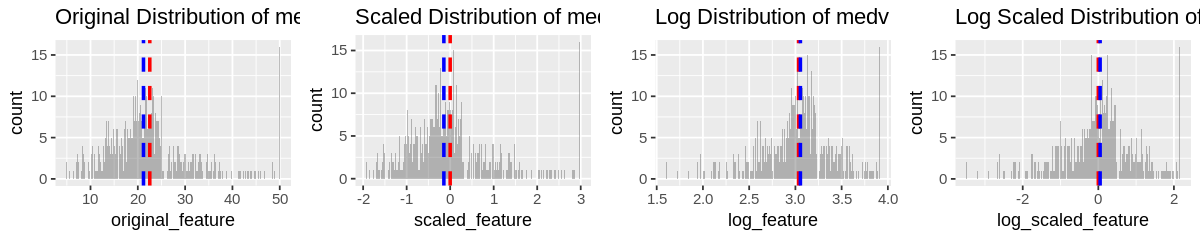

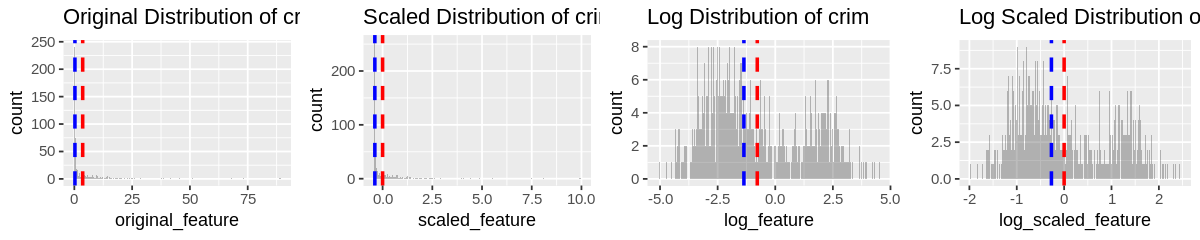

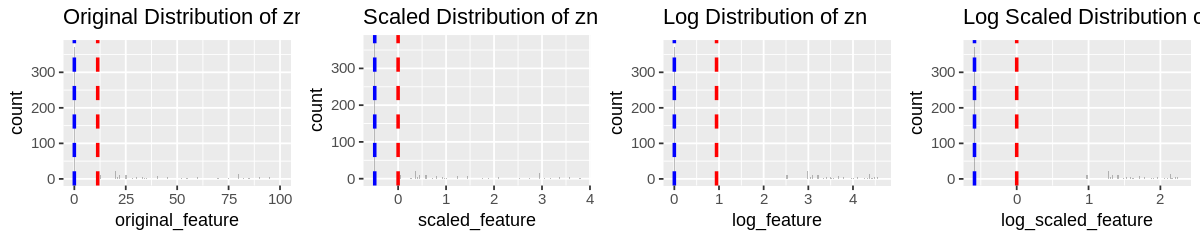

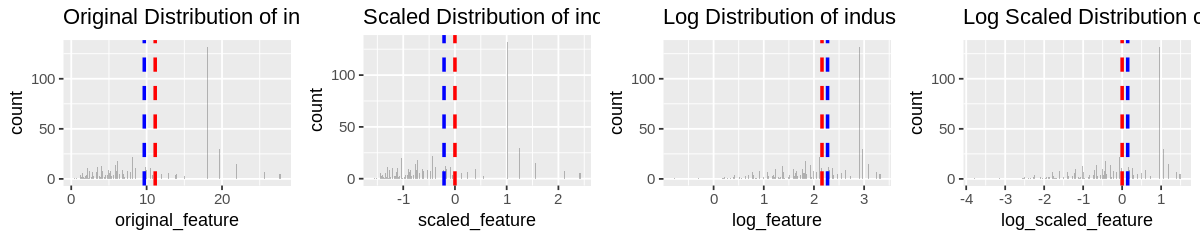

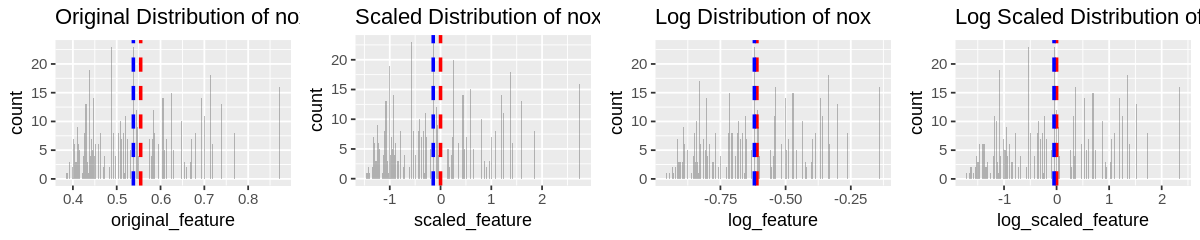

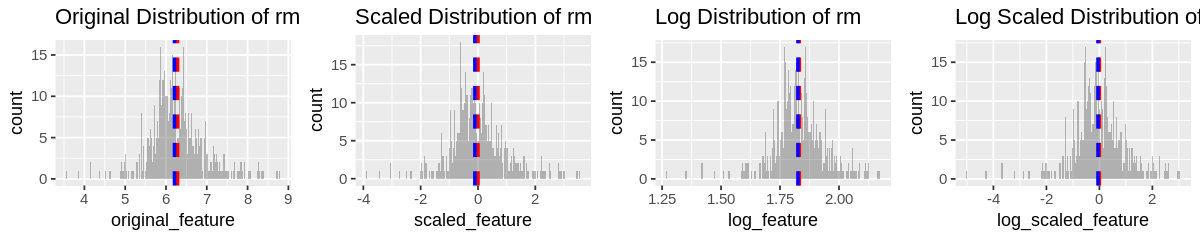

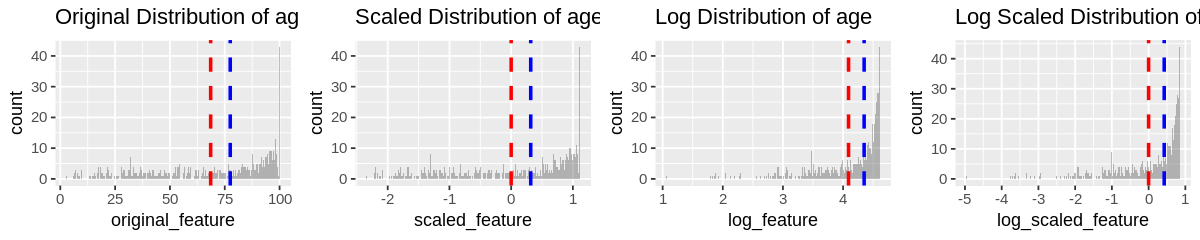

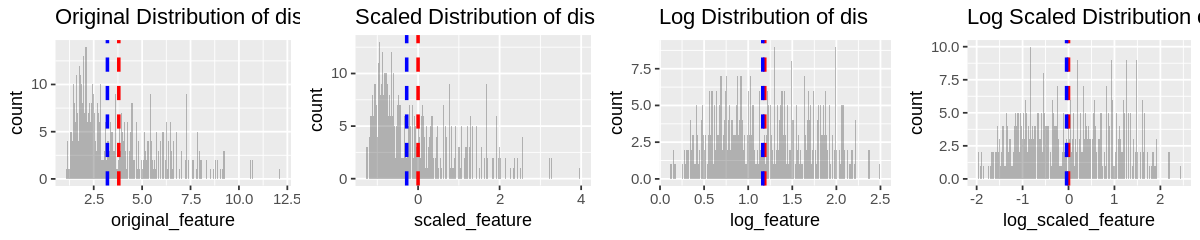

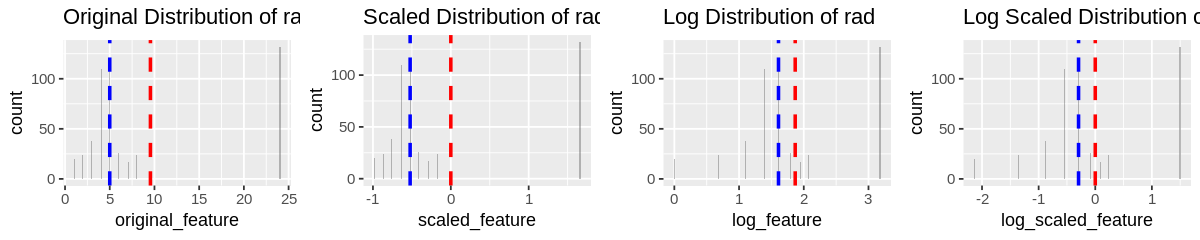

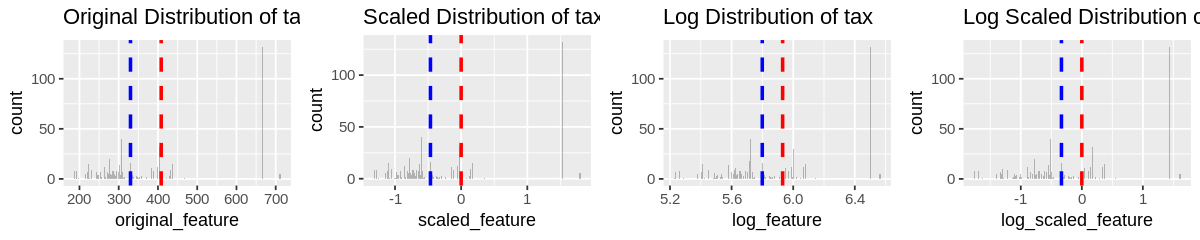

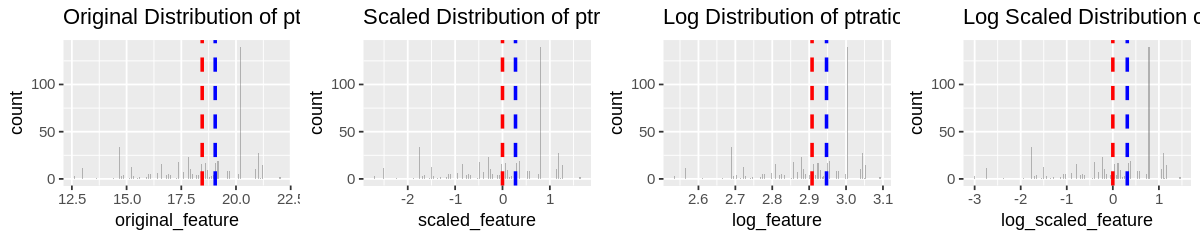

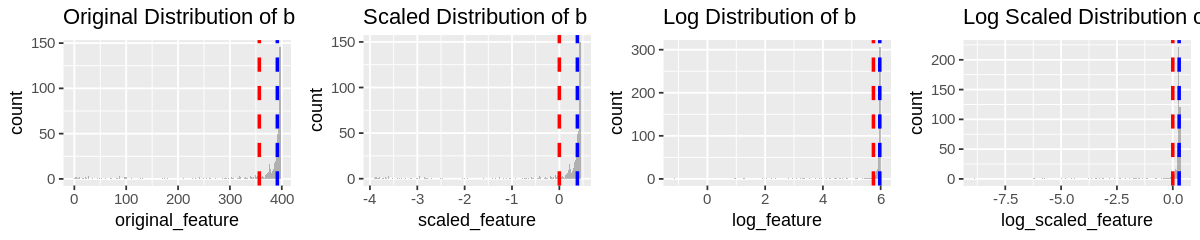

$medv
NULL

$crim
NULL

$zn
NULL

$indus
NULL

$nox
NULL

$rm
NULL

$age
NULL

$dis
NULL

$rad
NULL

$tax
NULL

$ptratio
NULL

$b
NULL

$lstat
NULL


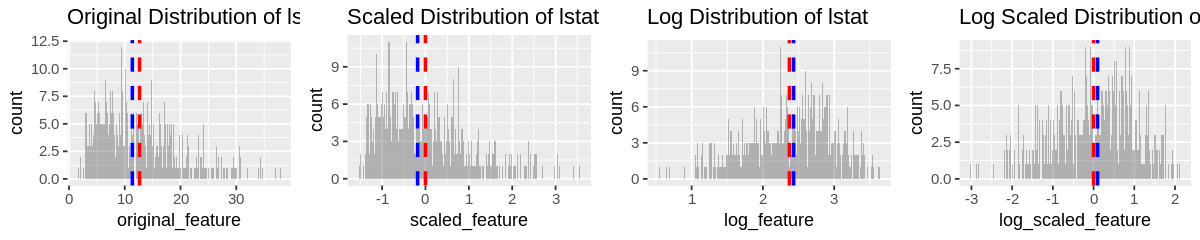

In [8]:
original_v_scaled_v_log <- function (feature) {
    original_feature <- as.vector(bh2_numeric_feat[[feature]])
    scaled_feature <- as.vector(bh2_zscr[[feature]])
    log_feature <- as.vector(bh2_log[[feature]])
    log_scaled_feature <- as.vector(bh2_log_zscr[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    p3 <- qplot(log_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Log Distribution of", feature))
    p4 <- qplot(log_scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Log Scaled Distribution of", feature))  
    multiplot(p1, p2, p3, p4, cols=4)
}

library(repr)
options(repr.plot.width=10, repr.plot.height=2) 
# sapply(colnames(sample_num_feat), original_v_scaled) is equiv. to pseudocode:
# for (column_name in colnames(sample_num_feat)):
#     original_v_scaled(col_name)
sapply(colnames(bh2_numeric_feat), original_v_scaled_v_log)